***Hello World***

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
# data = pd.read_csv("./Processed Data/preprocessedNP.csv")
data = pd.read_csv('./Processed Data/preprocessedwithStress.csv')
# data = pd.read_csv('./Processed Data/preprocessedNPWithWords.csv')
data.columns = ['useless','text', 'label']
# data.columns = ['text', 'label']

In [94]:
data.head(5)

,useless,text,label
0,0,"He said he had not felt that way before, sugge...",1
1,1,"Hey there r/assistance, Not sure if this is th...",0
2,2,My mom then hit me with the newspaper and it s...,1
3,3,"until i met my new boyfriend, he is amazing, h...",1
4,4,October is Domestic Violence Awareness Month a...,1


In [95]:
data.drop('useless',axis=1,inplace=True)

In [96]:
data

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
5136,this is jimin to yoongi unhappy .2,1
5137,yes it would have if it hadn't been for those...,0
5138,need moodbooster juseyo unhappy,1
5139,congratyoulations Harry!!!!! Been with you sin...,1


In [54]:
# import nltk
# import re
# nltk.download('stopwords')
# stemmer = nltk.SnowballStemmer("english")
# from nltk.corpus import stopwords
# import string
# stopword=set(stopwords.words('english'))

# def clean(text):
#     text = str(text).lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     text = [word for word in text.split(' ') if word not in stopword]
#     text=" ".join(text)
#     text = [stemmer.stem(word) for word in text.split(' ')]
#     text=" ".join(text)
#     return text
# data["text"] = data["text"].apply(clean)

In [55]:
data

,text,label
0,retreated,1
1,bleak,1
2,hissed,1
3,0 motivation to study unhappy,1
4,I MISSED YOU A WHOLE LOT unhappy,1
...,...,...
9085,poise,0
9086,until they put a password on their Wi-Fi :)KI...,0
9087,erratic,1
9088,lunaticism,1


***Now, Labeling the the Text, [Stress,No Stress]***

In [56]:
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]
print(data.head())

                                 text   label
0                           retreated  Stress
1                               bleak  Stress
2                              hissed  Stress
3     0 motivation to study unhappy    Stress
4  I MISSED YOU A WHOLE LOT unhappy    Stress


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.33,random_state=42)

In [58]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
model = BernoulliNB()
model.fit(xtrain, ytrain)
# print("Accuracy of Logistic Regression model is:",
# metrics.accuracy_score(ytest, ytrain)*100)

BernoulliNB()

In [59]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

['Stress']


In [60]:
scores = []
scores.append(model.score(xtest,ytest))
# scoresdf
# dict = {'Algorithm':'Naive Bayes','Score':model.score(xtest,ytest)}
# scoresdf  = scoresdf.append(dict, ignore_index = True)
model.score(xtest,ytest)*100


73.7

In [61]:
from sklearn.metrics import classification_report
pred_bern = model.predict(xtest)
print(classification_report(ytest, pred_bern))

              precision    recall  f1-score   support

   No Stress       0.86      0.30      0.45      1058
      Stress       0.72      0.97      0.83      1942

    accuracy                           0.74      3000
   macro avg       0.79      0.64      0.64      3000
weighted avg       0.77      0.74      0.69      3000



In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred_bern)

array([[ 321,  737],
       [  52, 1890]], dtype=int64)

In [63]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(xtrain,ytrain)

LogisticRegression()

In [64]:
scores.append(model2.score(xtest,ytest))
model2.score(xtest,ytest)*100
dict = {'Algorithm':'LogisticRegression','Score':model2.score(xtest,ytest)}
# scoresdf  = scoresdf.append(dict, ignore_index = True)

In [65]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model2.predict(data)
print(output)

['Stress']


In [66]:
from sklearn.metrics import confusion_matrix
pred_logis = model2.predict(xtest)
confusion_matrix(ytest,pred_logis)

array([[ 337,  721],
       [  35, 1907]], dtype=int64)

In [67]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(xtrain,ytrain)


DecisionTreeClassifier()

In [68]:
scores.append(model3.score(xtest,ytest))
model3.score(xtest,ytest)*100

75.53333333333333

In [69]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model3.predict(data)
print(output)

['Stress']


In [70]:
pred_decs = model3.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred_decs)

array([[ 370,  688],
       [  46, 1896]], dtype=int64)

Text(69.0, 0.5, 'truth')

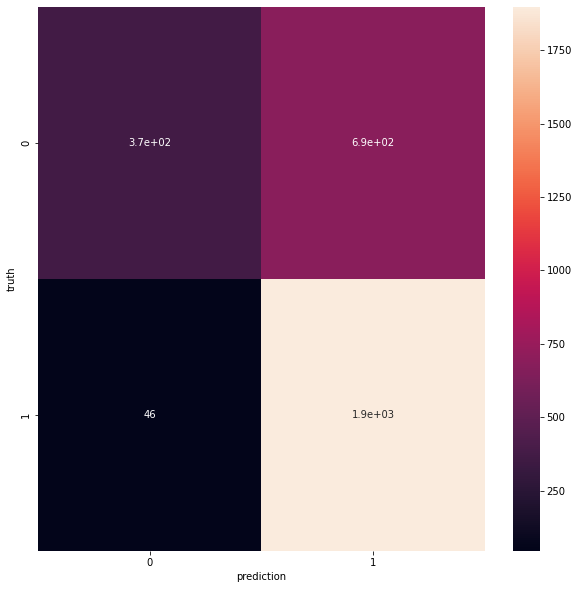

In [71]:
plt.figure(figsize=(10,10))
sn.heatmap(confusion_matrix(ytest,pred_decs),annot=True)
plt.xlabel('prediction')
plt.ylabel('truth')

In [72]:
from sklearn.neighbors import KNeighborsClassifier
model4= KNeighborsClassifier()
model4.fit(xtrain,ytrain)

KNeighborsClassifier()

In [73]:
scores.append(model4.score(xtest,ytest))
model4.score(xtest,ytest)*100

73.93333333333332

In [74]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model4.predict(data)
print(output)

['Stress']


In [75]:
pred_knn = model4.predict(xtest)

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred_knn)

array([[ 305,  753],
       [  29, 1913]], dtype=int64)

In [77]:
from sklearn.svm import SVC
model5 = SVC(C=2)
model5.fit(xtrain,ytrain)

SVC(C=2)

In [78]:
model5.score(xtest,ytest)*100

73.63333333333333

In [79]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model5.predict(data)
print(output)

['Stress']


In [80]:
pred_svm=model5.predict(xtest)

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred_svm)

array([[ 374,  684],
       [ 107, 1835]], dtype=int64)

In [82]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier()
model6.fit(xtrain,ytrain)

RandomForestClassifier()

In [83]:
model6.score(xtest,ytest)

0.7536666666666667

In [84]:
pred_rand = model6.predict(xtest)

In [85]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model6.predict(data)
check = output
print(output)

['Stress']


In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred_rand)

array([[ 358,  700],
       [  39, 1903]], dtype=int64)

In [87]:
dict = {'Algo':['NaiveBayes','LogisticRegression','DecisionTree','KNN','SVC','RandomForest'],
        'Score':[model.score(xtest,ytest),model2.score(xtest,ytest),model3.score(xtest,ytest),model4.score(xtest,ytest),
                 model5.score(xtest,ytest),model6.score(xtest,ytest)]}
scoresdf = pd.DataFrame.from_dict(dict)

In [88]:
scoresdf

,Algo,Score
0,NaiveBayes,0.737000
1,LogisticRegression,0.748000
2,DecisionTree,0.755333
3,KNN,0.739333
4,SVC,0.736333
5,RandomForest,0.753667


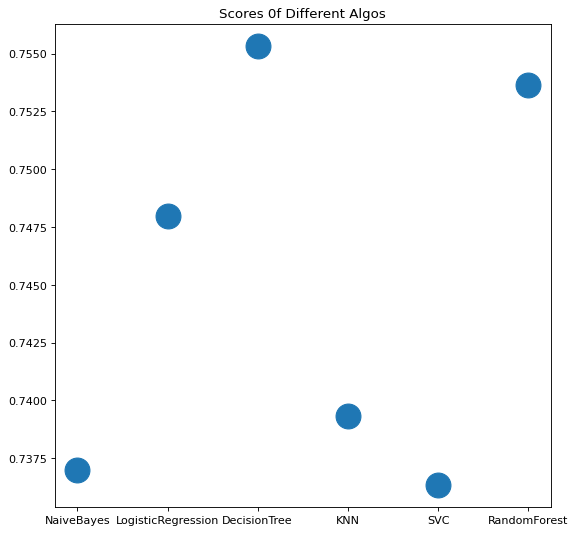

In [89]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(scoresdf['Algo'],scoresdf['Score'],s=500)
plt.title("Scores 0f Different Algos")
plt.show()

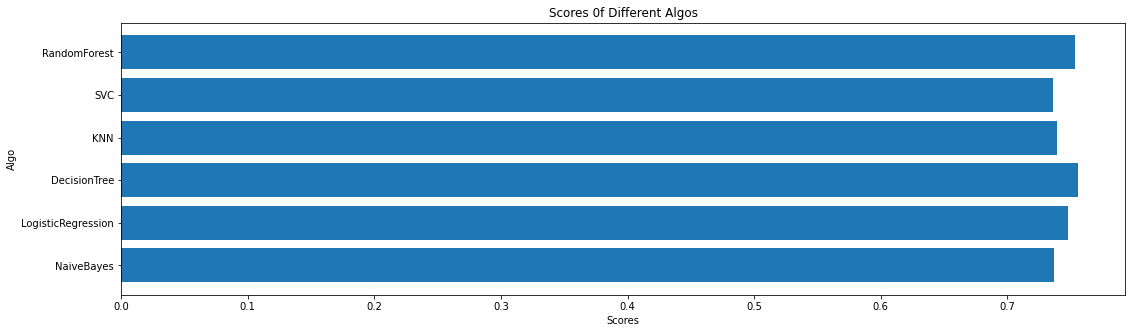

In [90]:
x,y = scoresdf['Algo'],scoresdf['Score']
f, ax = plt.subplots(figsize=(18,5))
# y = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.1])
plt.barh(x, y)
plt.ylabel("Algo")
plt.xlabel('Scores')
plt.title("Scores 0f Different Algos")
plt.show()